Proyek Akhir : Klasifikasi Gambar dikerjakan oleh Muhammad Jafar Shidik dengan email mjafarshidik86@gmail.com

In [1]:
#Mengunduh file dataset
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-05-24 14:11:20--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  1.02MB/s    in 12m 27s 

2021-05-24 14:23:48 (422 KB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [2]:
#Mengekstrak file zip
import zipfile, os

local_zip = '/tmp/rockpaperscissors.zip' 
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors/rps-cv-images'

In [3]:
os.listdir(base_dir)

['README_rpc-cv-images.txt', 'scissors', 'paper', 'rock']

In [4]:
#Image Generator - Mengimpor modul yang digunakan
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
#Pemisahan data (Training 60% dan Validation 40%)
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'wrap',
                    validation_split=0.4
                    )


In [6]:
train_generator = train_datagen.flow_from_directory(
        base_dir,
        target_size=(100, 150),
        shuffle=True,
        subset='training'
        )
 
validation_generator = train_datagen.flow_from_directory(
        base_dir,
        target_size=(100, 150),
        subset='validation'
        )

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [7]:
#Menggunakan model sequential
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [8]:
#Kompilasi model
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [9]:
#Melakukan Training (Latihan)
model.fit(
      train_generator,
      steps_per_epoch=25,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=5,
      verbose=2)

Epoch 1/20
25/25 - 36s - loss: 1.0742 - accuracy: 0.4312 - val_loss: 0.9919 - val_accuracy: 0.4625
Epoch 2/20
25/25 - 6s - loss: 0.8205 - accuracy: 0.6288 - val_loss: 0.5990 - val_accuracy: 0.7937
Epoch 3/20
25/25 - 6s - loss: 0.4529 - accuracy: 0.8377 - val_loss: 0.4689 - val_accuracy: 0.8062
Epoch 4/20
25/25 - 6s - loss: 0.3092 - accuracy: 0.8922 - val_loss: 0.3087 - val_accuracy: 0.9062
Epoch 5/20
25/25 - 6s - loss: 0.2601 - accuracy: 0.8974 - val_loss: 0.1811 - val_accuracy: 0.9438
Epoch 6/20
25/25 - 6s - loss: 0.1991 - accuracy: 0.9275 - val_loss: 0.2618 - val_accuracy: 0.9125
Epoch 7/20
25/25 - 6s - loss: 0.1564 - accuracy: 0.9481 - val_loss: 0.1084 - val_accuracy: 0.9625
Epoch 8/20
25/25 - 6s - loss: 0.1186 - accuracy: 0.9623 - val_loss: 0.1776 - val_accuracy: 0.9563
Epoch 9/20
25/25 - 6s - loss: 0.0842 - accuracy: 0.9766 - val_loss: 0.0737 - val_accuracy: 0.9812
Epoch 10/20
25/25 - 6s - loss: 0.1204 - accuracy: 0.9600 - val_loss: 0.1804 - val_accuracy: 0.9438
Epoch 11/20
25/25 

In [10]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Saving 4dpYSXpjYbiH9MSq.png to 4dpYSXpjYbiH9MSq.png
4dpYSXpjYbiH9MSq.png
Gambar tersebut berbentuk kertas


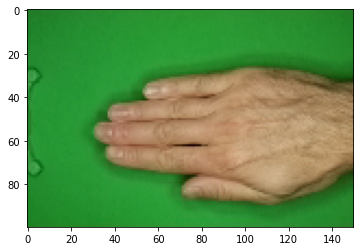

In [11]:
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  path = fn
  img = image.load_img(path, target_size=(100,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)

  if classes[0][0]==1:
    print('Gambar tersebut berbentuk kertas')
  elif classes[0][1]==1:
    print('Gambar tersebut berbentuk batu')
  elif classes[0][2]==1:
    print('Gambar tersebut berbentuk gunting')
  else:
    print('Gambar tidak diketahui')